## *K-nearest neighbor from scratch*

In [179]:
import numpy as np
import pandas as pd
from scipy.stats import mode
from sklearn.metrics import accuracy_score
from collections import Counter
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['#FF0000','#00FF00','#0000FF'])

## *We will be using the iris dataset for this implementation. Feel free to use any dataset for this.*

## *Before jumping into the implementation let's visulaize the data, check the shape of training set and testing set.*
## *Check the number of columns and rows, values the table holds.*
## *Visualize the data in the form of a scatter plot to check the distribution.*

In [ ]:
## Load the dataset from sklearn datset
iris = datasets.load_iris()

## Splitting the data into X and y
X,y = iris.data,iris.target 

In [181]:
## train test the data from above X and Y

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size= 0.3, random_state=4342)

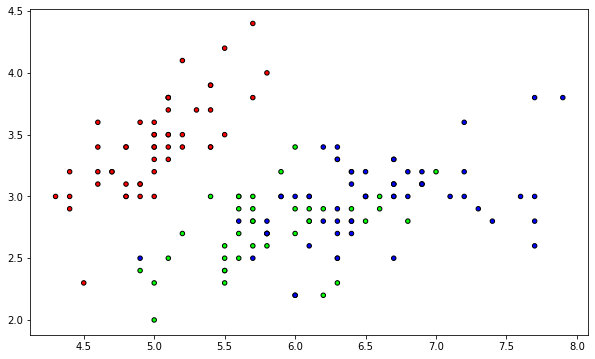

In [182]:
## draw a scatter plot to check the distribution of the data

plt.figure(figsize =(10,6))
plt.scatter(X[:,0],X[:,1], c=y, cmap=cmap, edgecolor='k',s=20)
plt.show()

## *Scratch implementation*

In [184]:
'''
1. Selecting the distance metric to calculate the distance between the data points 
        i.e. Eucledian, manhattan,mahalanobis etc.

2. Storing the distances in a numpy array and sort it in ascending order by preserving the indices. 
    (Numpy argsort method helps to achieve that)
    
3. Selecting the k nearest element from the sorted list.

4. By performing majority voting we select the most common label for the test data point
'''

## A function to find the eucledian distance between our test data points and training data points
def knn_distance(y,p1):
    distance = np.sqrt(np.sum((y-p1)**2))
    return distance

def knn(x_train, y_train,point,k):
    '''
--> x_train = training points in our data
--> y_train = the labels cooresponding to our training points
--> point = the test data point/points, whose label we will determine
--> k = number of nearest elements we want to select
    '''
    result=[] # final list for our test labels.
    
    for i in point:
        
        distance_list=[] # an empty list to append our calculated distance
        
        for j in range(len(x_train)): # looping over our training data points to find the distance.
            distance = knn_distance(np.array(x_train[j,:]),i)
            distance_list.append(distance)
        distance_list = np.array(distance_list)
        
        ## numpy argsort will return the indices of the distances
        distance_ascending = np.argsort(distance_list)[:k] ## numpy argsort will return the indices of the distances
        
        label = y_train[distance_ascending] ## as distance has the indices and if we put the indices in y, we get the correcsponding value.
        
        #Note: most common method from Counter is another concept by which we can find the most common label from a list.
#         output_label = Counter(label).most_common(1)
        
#          Majority Voting voting concept is to find the most common element. Returns a list
        major_label = mode(label)
        major_label = major_label.mode[0]
        result.append(major_label) ## print this to get an idea of the labels
        
    return result

## *We are testing this on iris dataset.*

In [185]:
predict = knn(X_train,y_train,X_test,7)

In [186]:
## Accuracy imported from sklearn
print("The accuracy score of our prediction: {}".format(accuracy_score(y_test,predict)))

The accuracy score of our prediction: 0.9555555555555556


In [187]:
##Accuracy from scratch, behind the hood what goes on.
accuracy_scratch = np.sum(predict==y_test)/len(y_test)
print("The accuracy score of our prediction: {}".format(accuracy_scratch))

The accuracy score of our prediction: 0.9555555555555556
